In [1]:

import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('laptops_10.csv',sep=',')
df.head()

,Company,Product,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,Price_euros,Cpu_Company,Memory_Amount,Memory_Type
0,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 2.3GHz,8GB,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,Intel,128,SSD
1,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5 1.8GHz,8GB,Intel HD Graphics 6000,macOS,1.34,898.94,Intel,128,FlashStorage
2,HP,250 G6,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8GB,Intel HD Graphics 620,No OS,1.86,575.00,Intel,256,SSD
3,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7 2.7GHz,16GB,AMD Radeon Pro 455,macOS,1.83,2537.45,Intel,512,SSD
4,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 3.1GHz,8GB,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,Intel,256,SSD


1.1 Изучите распределение количества памяти
(Memory_Amount) с помощью matplotlib

1.2 Изучите распределение стоимости ноутбуков
(Price_euros) с помощью matplotlib

1.3 Изучите распределение веса ноутбуков (Weight) с
помощью matplotlib

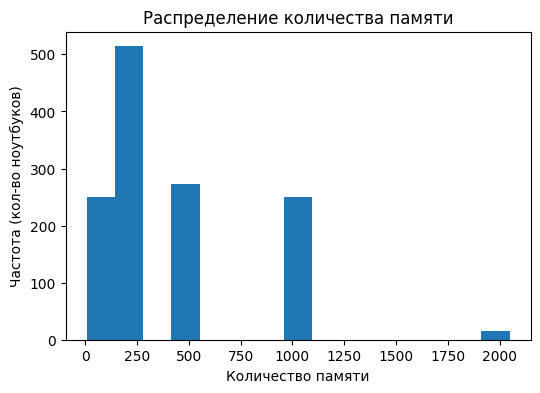

In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize = (6, 4))
plt.hist(df['Memory_Amount'], bins=15)
plt.title('Распределение количества памяти')
plt.xlabel('Количество памяти')
plt.ylabel('Частота (кол-во ноутбуков)');

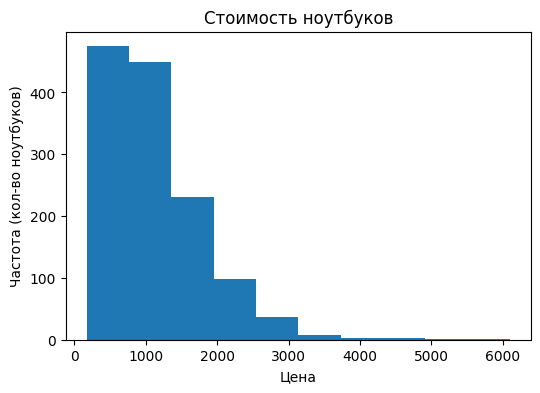

In [4]:
plt.figure(figsize = (6, 4))
plt.hist(df['Price_euros'], bins=10)
plt.title('Стоимость ноутбуков')
plt.xlabel('Цена')
plt.ylabel('Частота (кол-во ноутбуков)');

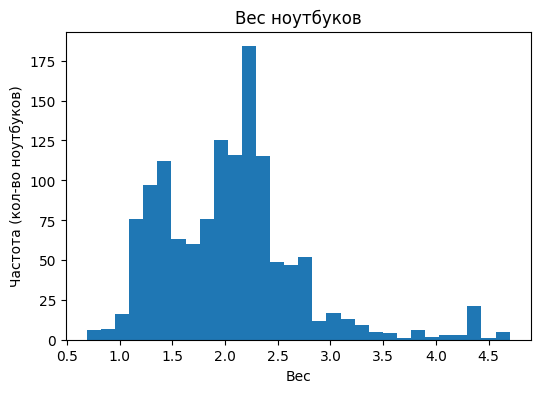

In [5]:
plt.figure(figsize = (6, 4))
plt.hist(df['Weight'], bins=30)
plt.title('Вес ноутбуков')
plt.xlabel('Вес')
plt.ylabel('Частота (кол-во ноутбуков)');

Задание 2.

2.1 Изучите распределение типов носителя (Memory_Type)

2.2 Изучите распределение компаний производителей
(Company)

2.3 Изучите распределение операционной системы (OpSys)

2.4 Изучите распределение компаний производителей CPU
(Cpu_Company)

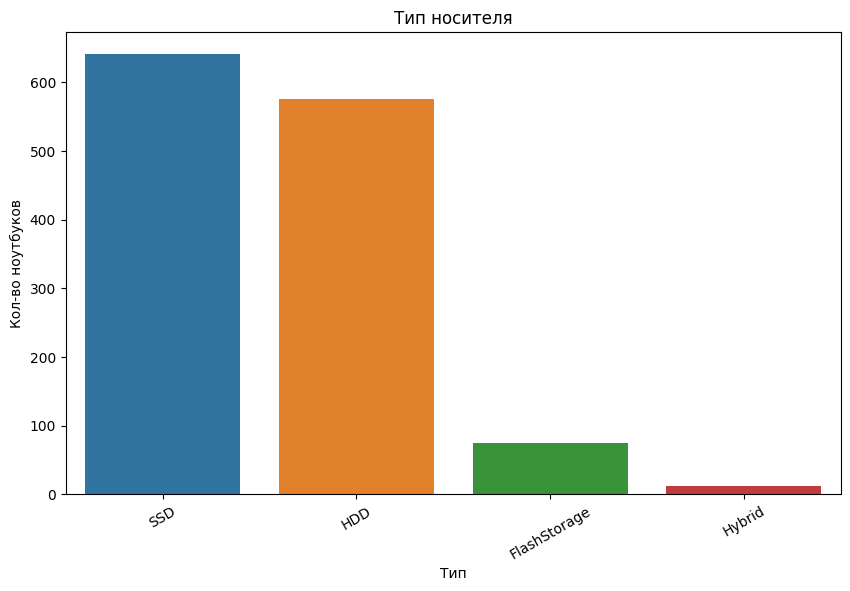

In [6]:
plt.figure(figsize=(10, 6))

#sns.histplot(df['Memory_Type'], bins=15)
vc = df['Memory_Type'].value_counts()
sns.barplot(x=vc.index, y=vc.values)

plt.title('Тип носителя')
plt.xlabel('Тип')
plt.xticks(rotation=30);
plt.ylabel('Кол-во ноутбуков');

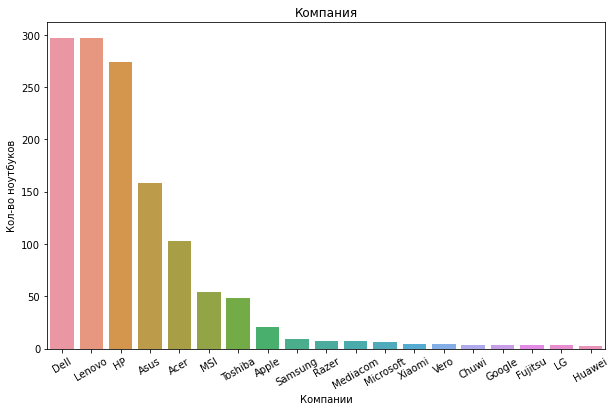

In [65]:
plt.figure(figsize=(10, 6))
vc = df['Company'].value_counts()
sns.barplot(x=vc.index, y=vc.values)
plt.title('Компания')
plt.xlabel('Компании')
plt.xticks(rotation=30);
plt.ylabel('Кол-во ноутбуков');

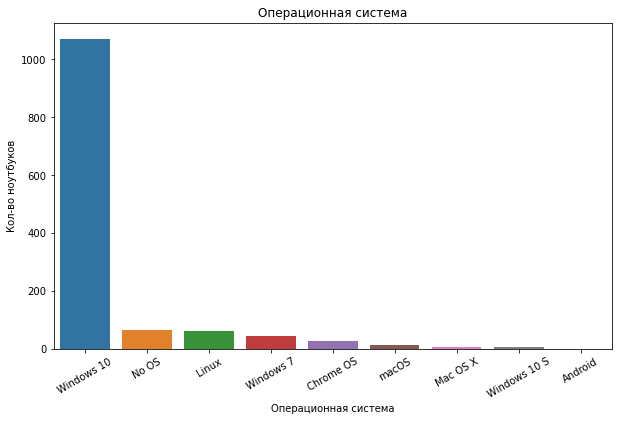

In [67]:
plt.figure(figsize=(10, 6))
vc = df['OpSys'].value_counts()
sns.barplot(x=vc.index, y=vc.values)
plt.title('Операционная система')
plt.xlabel('Операционная система')
plt.xticks(rotation=30);
plt.ylabel('Кол-во ноутбуков');

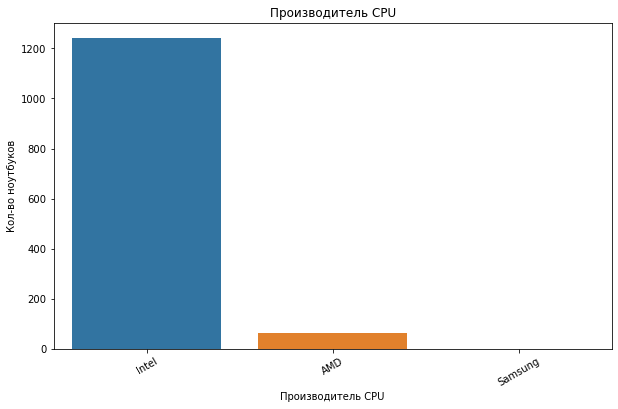

In [62]:
plt.figure(figsize=(10, 6))
vc = df['Cpu_Company'].value_counts()
sns.barplot(x=vc.index, y=vc.values)
plt.title('Производитель CPU')
plt.xlabel('Производитель CPU')
plt.xticks(rotation=30);
plt.ylabel('Кол-во ноутбуков');

Задание 3.

Изучите взаимосвязь компаний производителей ноутбуков и
компаний производителей процессоров, используя сложенную
или многорядовую столбчатую диаграмму

Процессоры от Samsung не изучайте

3.1 Постройте график в абсолютных величинах


3.2 Постройте график в относительных величинах

In [86]:
#data = pd.crosstab(df['job'], df['convert']).reset_index().sort_values(by=0, ascending=False)
#data.rename(columns={0: 'no', 1: 'yes'}, inplace=True)
#data.head()

data = pd.crosstab(df['Company'], df['Cpu_Company']).reset_index().sort_values(by='Intel', ascending=False)
data.drop(columns=['Samsung'], inplace = True)
data.head()


Cpu_Company,Company,AMD,Intel
4,Dell,0,297
10,Lenovo,16,281
7,HP,25,249
2,Asus,11,147
0,Acer,10,93


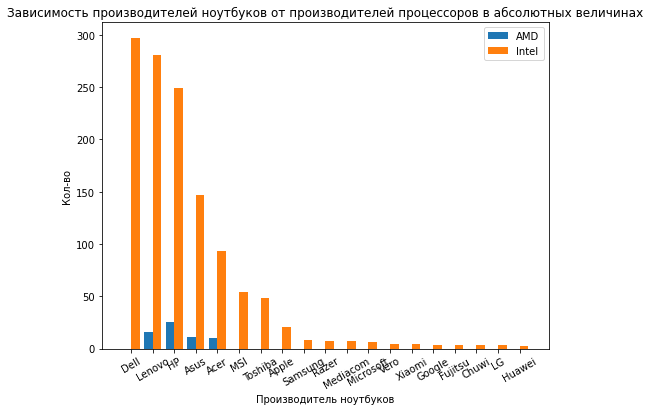

In [78]:


# Строим столбчатую многорядную диаграмму

plt.figure(figsize=(8, 6))

# определяем кол-во делений
n_ticks = np.arange(len(data['Company']))

# определяем сдвиг
offset = 0.2

# определяем ширину столбцов
w = 0.4

# добавляем сдвиг к кол-ву делений
plt.bar(n_ticks - offset, data['AMD'], width=w)
plt.bar(n_ticks + offset, data['Intel'], width=w)

plt.title('Зависимость производителей ноутбуков от производителей процессоров в абсолютных величинах')
plt.xlabel('Производитель ноутбуков')
plt.ylabel('Кол-во')
plt.legend(['AMD', 'Intel'])
plt.xticks(n_ticks, data['Company'], rotation = 30);  # добавляем метки делений



In [80]:
data = pd.crosstab(df['Company'], df['Cpu_Company'], normalize = 'index').reset_index().sort_values(by='Intel', ascending=False)
data.drop(columns=['Samsung'], inplace = True)
data.head(10)


Cpu_Company,Company,AMD,Intel
9,LG,0.0,1.0
1,Apple,0.0,1.0
17,Vero,0.0,1.0
16,Toshiba,0.0,1.0
14,Razer,0.0,1.0
13,Microsoft,0.0,1.0
12,Mediacom,0.0,1.0
11,MSI,0.0,1.0
18,Xiaomi,0.0,1.0
8,Huawei,0.0,1.0


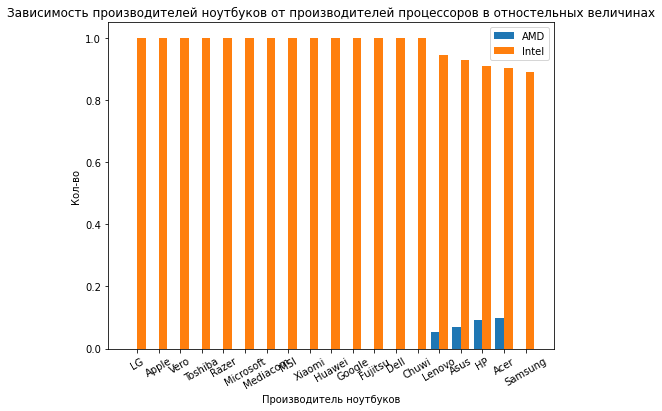

In [82]:


# Строим столбчатую многорядную диаграмму

plt.figure(figsize=(8, 6))

# определяем кол-во делений
n_ticks = np.arange(len(data['Company']))

# определяем сдвиг
offset = 0.2

# определяем ширину столбцов
w = 0.4

# добавляем сдвиг к кол-ву делений
plt.bar(n_ticks - offset, data['AMD'], width=w)
plt.bar(n_ticks + offset, data['Intel'], width=w)

plt.title('Зависимость производителей ноутбуков от производителей процессоров в отностельных величинах')
plt.xlabel('Производитель ноутбуков')
plt.ylabel('Кол-во')
plt.legend(['AMD', 'Intel'])
plt.xticks(n_ticks, data['Company'], rotation = 30);  # добавляем метки делений



Задание 4.

4.1 Изучите взаимосвязь стоимости ноутбука и компании
производителя процессора

4.2 Изучите взаимосвязь стоимости ноутбука и типа
носителя памяти

4.3 Изучите взаимосвязь стоимости ноутбука и кол-ва
оперативной памяти

4.4 Изучите взаимосвязь стоимости ноутбука и компании
производителя

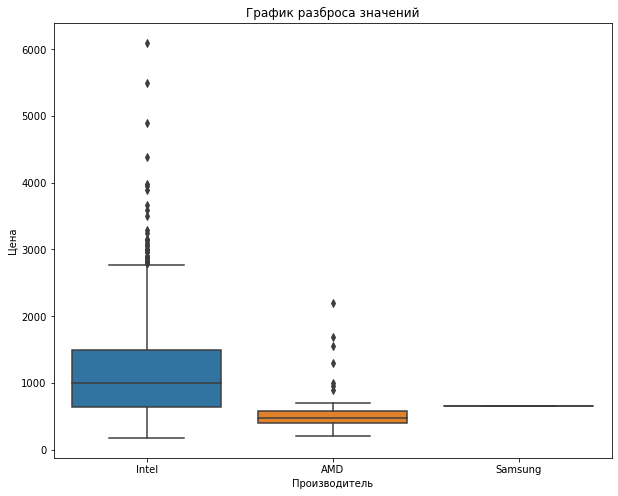

In [96]:
plt.figure(figsize=(10, 8))

sns.boxplot(x = df['Cpu_Company'], y = df['Price_euros'] )

plt.title('График разброса значений стоимости ноутбука и компании производителя процессора')
plt.xlabel('Производитель')
plt.ylabel('Цена');

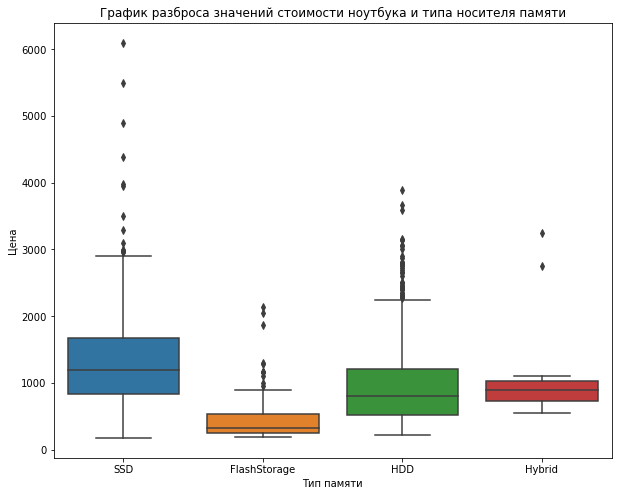

In [100]:
plt.figure(figsize=(10, 8))

sns.boxplot(x = df['Memory_Type'], y = df['Price_euros'] )

plt.title('График разброса значений стоимости ноутбука и типа носителя памяти')
plt.xlabel('Тип памяти')
plt.ylabel('Цена');

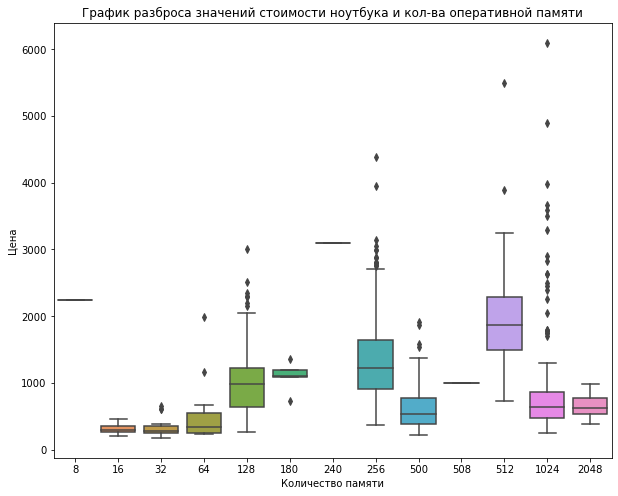

In [103]:
plt.figure(figsize=(10, 8))

sns.boxplot(x = df['Memory_Amount'], y = df['Price_euros'] )

plt.title('График разброса значений стоимости ноутбука и кол-ва оперативной памяти')
plt.xlabel('Количество памяти')
plt.ylabel('Цена');

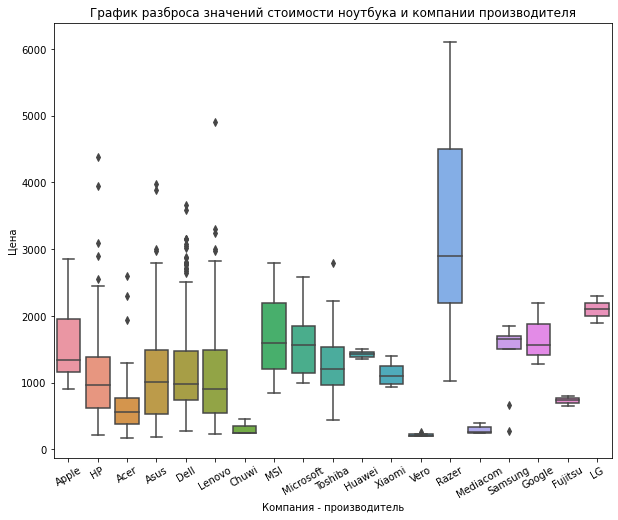

In [104]:
plt.figure(figsize=(10, 8))

sns.boxplot(x = df['Company'], y = df['Price_euros'] )

plt.title('График разброса значений стоимости ноутбука и компании производителя')
plt.xlabel('Компания - производитель')
plt.xticks(rotation = 30)
plt.ylabel('Цена');

Задание 5*.

Постройте матрицу корреляций для таблицы

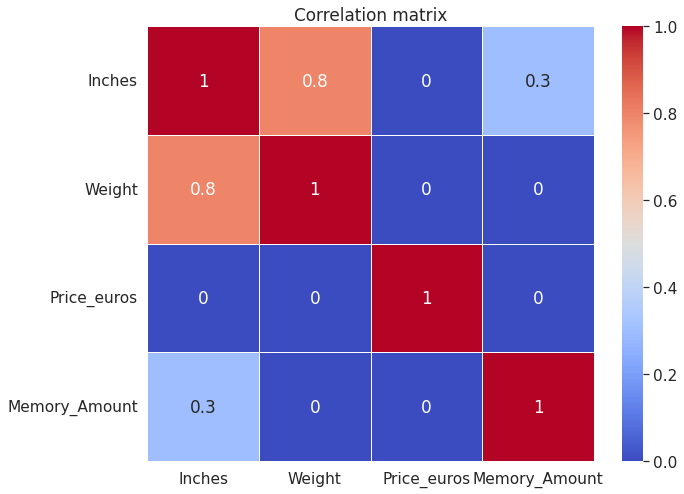

In [105]:
corr_matrix = df.corr()
corr_matrix = np.round(corr_matrix, 1)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0
corr_matrix

plt.figure(figsize=(10, 8))

sns.set(font_scale=1.4)

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Correlation matrix');



<Figure size 720x576 with 0 Axes>

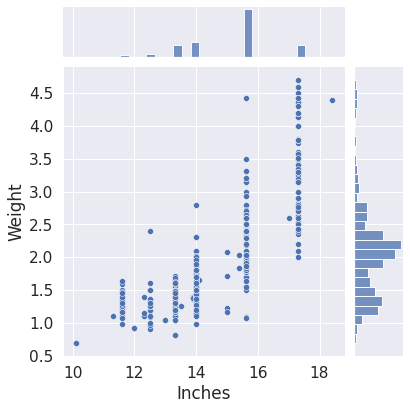

In [109]:
plt.figure(figsize=(10, 8))

sns.jointplot(x = df['Inches'], y = df['Weight'] )